<a href="https://colab.research.google.com/github/jfpablos/TFM/blob/master/pruebaWebScraping/pruebaWebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
from bs4 import BeautifulSoup
import re

In [3]:
!apt-get update
!apt install chromium-chromedriver
!pip install selenium
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,609 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [801 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [801 B]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages

## URLs

In [0]:
url = {
    'google': 'https://www.google.com/search?q=ibex+35&lr=&cr=countryES&hl=es&tbs=ctr:countryES&source=lnms&tbm=nws',
    'bing': 'https://www.bing.com/news/search?q=ibex+35&cc=es',
    'yahoo': 'https://es.news.search.yahoo.com/search?p=ibex+35',
    'duck': 'https://duckduckgo.com/?q=ibex+35&t=h_&iar=news&ia=news&kl=es-es&df=d',
    'ask': 'https://www.search.ask.com/search?ctype=news&q=ibex+35',
    'naver': 'https://search.naver.com/search.naver?where=news&query=ibex+35',
    'baidu': 'https://www.baidu.com/s?wd=ibex+35&tn=news&rtt=1',
    'yandex': 'https://news.yandex.com/yandsearch?rpt=nnews2&grhow=clutop&text=ibex%2035',
    'qwant' : 'https://www.qwant.com/?q=ibex+35&t=news'
}

#https://www.bing.com/news/search?q=ibex+35&cc=IT para cambiar de pais se cambia el parametro cc= , pj: cc=IT Italia, cc=ES España, cc=DE Alemania
#https://www.qwant.com/?q=ibex+35&t=news&r=ES

## Google

In [0]:
google = requests.get('https://www.google.com/search?q=ibex+35&lr=&cr=countryDE&hl=es&tbs=ctr:countryDE&tbm=nws').text
soupGoogle = BeautifulSoup(google, "html.parser")

In [0]:
print(soupGoogle.prettify())

<!DOCTYPE doctype html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="es-US">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <noscript>
   <meta content="0;url=/search?q=ibex+35&amp;tbm=nws&amp;tbs=ctr:countryES&amp;lr=&amp;cr=countryES&amp;hl=es&amp;ie=UTF-8&amp;gbv=1&amp;sei=PjaCXOuXGsHv5gLrvIXgAQ" http-equiv="refresh"/>
   <style>
    table,div,span,p{display:none}
   </style>
   <div style="display:block">
    Haz clic
    <a href="/search?q=ibex+35&amp;tbm=nws&amp;tbs=ctr:countryES&amp;lr=&amp;cr=countryES&amp;hl=es&amp;ie=UTF-8&amp;gbv=1&amp;sei=PjaCXOuXGsHv5gLrvIXgAQ">
     aquí
    </a>
    si no vuelves a acceder en pocos segundos.
   </div>
  </noscript>
  <title>
   ibex 35 - Buscar con Google
  </title>
  <style>
   #gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !imp

In [0]:
print(soupGoogle.find_all("div", {"class" :"g"}).prett)

[<div class="g"><table><tr><td style="width:516px" valign="top"><h3 class="r"><a href="/url?q=http://thecorner.eu/uncategorised/will-masmovil-join-the-ibex-35/78703/&amp;sa=U&amp;ved=0ahUKEwiXisHyjfLgAhXv01kKHfh2BlMQqQIIFCgAMAA&amp;usg=AOvVaw34ztQyNHdUrBkfZsbS2N5w">Will MasMovil Join The <b>Ibex 35</b>?</a></h3><div class="slp"><span class="f">The Corner Economic - 2 days ago</span></div><div class="st">This Thursday, 7 March, the Technical Advisory Committee of the <b>Ibex 35</b> (CAT in tits Spanish acronym) will hold its routine meeting. On this ...</div></td><td style="padding:2px 0 0 8px;font-size:77%;text-align:center" valign="top"><a href="/url?q=http://thecorner.eu/uncategorised/will-masmovil-join-the-ibex-35/78703/&amp;sa=U&amp;ved=0ahUKEwiXisHyjfLgAhXv01kKHfh2BlMQpwIIFTAA&amp;usg=AOvVaw1-lRO83KKad98LCWOkC1Nh"><img border="1" class="th" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWf3VfZbOZWiCX-_ux7JWnNIYxGhps808xonfKQEvRdrgqAx6Mm8wtedJ37BHEfllkyRjyb8o"/></a><di

In [0]:
aaa = [t.find('h3').text + t.find(class_="st").text for t in soupGoogle.find_all("div", {"class" :"g"})]
print(aaa)

['Will MasMovil Join The Ibex 35?This Thursday, 7 March, the Technical Advisory Committee of the Ibex 35 (CAT in tits Spanish acronym) will hold its routine meeting. On this\xa0...', 'Höchste Anspannung im spanischenWurde der Ibex35 im Sommer 2017 noch bei Notierungen von 11.000 Punkten gehandelt, waren davon zum Jahreswechsel nur noch 8287\xa0...', 'SG Index-Check am Mittag – Wunderbare Strukturen im IBEX 35Der IBEX 35 hat, wie zuletzt analytisch präferiert, die rechte Schulter einer potenziellen inversen S-K-S-Formation ausgebildet. Nun richtet sich\xa0...', 'Los consejos del Banco Santander y Bankinter son los únicos en los ...Los consejos de administración de Banco Santander y Bankinter son los únicos de entre las seis entidades financieras cotizadas en el Ibex 35\xa0...', 'Iberdrola supera los 3.000 millones de euros de beneficio netoLa rentabilidad total del accionista (RTA) se ha situado en el 14% en 2018, frente al -11,5% del Ibex 35 y al 5,2% del índice de referencia\xa0...', 

In [0]:
bbb = [t.find('div') for t in soupGoogle.find_all("div", {"class" :"g"})]
print(bbb)

[<div class="slp"><span class="f">The Corner Economic - 2 days ago</span></div>, <div class="slp"><span class="f">Xinhua - 1 day ago</span></div>, <div class="slp"><span class="f">El Confidencial - 13 hours ago</span></div>, <div class="slp"><span class="f">elEconomista.es - 17 hours ago</span></div>, <div class="slp"><span class="f">La Vanguardia - 23 hours ago</span></div>, <div class="slp"><span class="f">Cinco Días - 53 minutes ago</span></div>, <div class="slp"><span class="f">elEconomista.es - 1 day ago</span></div>, <div class="slp"><span class="f">Europa Press - 3 minutes ago</span></div>, <div class="slp"><span class="f">El Confidencial - 4 hours ago</span></div>, <div class="slp"><span class="f">Cinco Días - 2 hours ago</span></div>]


In [0]:
soupGoogle.find("a", attrs={"class" :"lLrAF"})

In [0]:
soupGoogle.find_all(class_='st')

[<div class="st">MADRID, March 6 (Xinhua) -- The Spanish <b>Ibex</b>-<b>35</b> stock exchange on Wednesday enjoyed a day of gains after two days of slight losses and ...</div>,
 <div class="st">This Thursday, 7 March, the Technical Advisory Committee of the <b>Ibex 35</b> (CAT in tits Spanish acronym) will hold its routine meeting. On this ...</div>,
 <div class="st">MADIRD, March 5 (Xinhua) -- The Spanish <b>Ibex</b>-<b>35</b> stock exchange registered a very small loss on Tuesday's trading. Trading in Madrid closed ...</div>,
 <div class="st">El <b>Ibex 35</b> ha iniciado la sesión de este jueves con una subida del 0,13%, lo que ha llevado al selectivo a situarse en los 9.309 enteros a las ...</div>,
 <div class="st">Coincidiendo con el recorte de las previsiones del BCE, el <b>Ibex</b> ha pasado de subir un 0,7% a cede un 0,3%, en línea con el resto de índices ...</div>,
 <div class="st">En lo que a rentabilidades se refiere, la diferencia de casi 5 puntos porcentuales que el <b>Ibe

In [0]:
tag = soupGoogle.find("div", id="search")
print(tag.pret)

<div id="search"><div id="ires"><ol><div class="g"><table><tr><td style="width:516px" valign="top"><h3 class="r"><a href="/url?q=https://www.lavanguardia.com/economia/20190305/46849239204/ibex-35-espana-bolsa-china-pib-estados-unidos.html&amp;sa=U&amp;ved=0ahUKEwit-v6X6urgAhUpvFkKHXghAJIQqQIIFCgAMAA&amp;usg=AOvVaw2k-F73LyjkYLdQGj2ZtXpS">El <b>Ibex 35</b> arranca con caídas y de nuevo pendiente de la guerra ...</a></h3><div class="slp"><span class="f">La Vanguardia - 2 hours ago</span></div><div class="st">El <b>Ibex 35</b> ha iniciado la sesión de este martes con comportamiento plano (-0,06%), lo que ha llevado al selectivo a situarse en los 9.253,8 ...</div><a href="/url?q=https://www.europapress.es/economia/bolsa-00348/noticia-ibex-35-abre-sesion-plano-006-aferra-9200-enteros-20190305091312.html&amp;sa=U&amp;ved=0ahUKEwit-v6X6urgAhUpvFkKHXghAJIQ-AsIFigAMAA&amp;usg=AOvVaw1d4m0ztvgy9McOitMYb73s">El <b>Ibex 35</b> abre la sesión plano (-0,06%) y se aferra a los 9.200 ...</a> <span class

## Bing 

In [0]:
try:
    bing = requests.get(url_bing)
    bingtext = bing.text
except:
    print("error en bing")
    
soupBing = BeautifulSoup(bingtext, "html.parser")

In [0]:
print(soupBing.prettify())

In [0]:
for text in soupBing.find_all('div', class_="snippet"):
    result = text.get_text()
    print(result)


El Ibex 35 mantenía un comportamiento plano en la media sesión de este martes (-0,04%), lo que ha llevado al selectivo a estancarse en el umbral de los 9.200 puntos, en una jornada marcada de nuevo po...
El Ibex 35 abre la sesión con leves descensos, alejándose del nivel de los 9.300 puntos, tras conocerse que Chin ha reducido sus previsiones de crecimiento para 2019, aunque el Gobierno del gigante as...
Las Bolsas europeas han cerrado con suaves alzas tras los rumores del inminente acuerdo comercial entre Estados Unidos y China y sin grandes referencias que cotizar. El Ibex ha quedado algo rezagado y ...
El principal indicador de la Bolsa española, el IBEX 35, subía un 0,16 % minutos después de la apertura de la sesión de este martes e ignoraba el miedo de otros mercados al frenazo cada vez más eviden...
El Ibex 35 ha iniciado la sesión de este martes con comportamiento plano (-0,06%), lo que ha llevado al selectivo a situarse en los 9.253,8 enteros a las 9.01 horas, en una jornada ma

In [0]:
for text in soupBing.find_all('a', class_="title"):
    result = text.get_text()
    print(result)

Economía/Bolsa.- El Ibex 35, plano a media sesión (-0,04%), continúa estancado en los 9.200 puntos
El Ibex 35 se para con los datos de China y las dudas sobre el acuerdo comercial
El Ibex 35 cierra plano tras chocar otra vez con los 9.300 puntos
El IBEX 35 ignora el miedo al frenazo de la economía china y sube un 0,16 %
El Ibex 35 abre la sesión plano y se aferra a los 9.200 enteros
Europa cotiza con suaves alzas tras las previsiones de crecimiento de China: el Ibex 35 mira a los 9.300
El Ibex-35 fracasa en su nuevo intento de superar los 9.300 puntos
Futuro Ibex 35 intradía: soporte intradía alrededor de 9210,00
Wall Street abre al alza pero es incapaz de animar al Ibex 35
El Ibex 35 cierra plano y vuelve a chocar con la barrera de los 9.260 puntos
Estas son las 5 acciones del Ibex 35 más baratas
El Ibex 35 cotiza plano en la media sesión y no retiene los 9.300 puntos


In [0]:
print(bing.status_code)

200


## Yahoo

In [0]:
yahoo = requests.get(url['yahoo']).text
soapYahoo = BeautifulSoup(yahoo, "html.parser")

In [0]:
print(soapYahoo.prettify())

In [0]:
tagYahoo = soapYahoo.find(class_='searchCenterMiddle')
for t in tagYahoo.find_all('li'):
  print(t.find('h3').text)
  print(t.find('p').text)

Ibex 35, en directo: los mercados dudan ante el pacto comercial y las previsiones económicas
Los inversores analizan el objetivo de crecimiento de China y su paquete de estímulo fiscal 
El IBEX 35 ignora el miedo al frenazo de la economía china y sube un 0,16 %
El principal indicador de la Bolsa española, el IBEX 35, subía un 0,16 % minutos después de la apertura de la sesión de este martes e ignoraba el ... 
El IBEX 35 cae un 0,06 % a mediodía influido por China y por Red Eléctrica
Madrid, 5 mar (EFE). El principal indicador de la Bolsa española, el IBEX 35, optaba por las ventas a mediodía y retrocedía un 0,06 %, lastrado por el frenazo de la economía china y por las ... 
El Ibex abre con un leve repunte pendiente de China
El Ibex-35 subía levemente en la apertura, al contrarrestar las nuevas medidas d... 
El IBEX 35 abre con un recorte del 0,04 % y se sitúa en los 9.255 puntos
El principal indicador de la Bolsa española, el IBEX 35, ha iniciado la sesión este martes con un pequeño r

In [0]:
'''def yahoo():
  page = requests.get(url['yahoo']).text
  soup = BeautifulSoup(page, "html.parser")
  tag = soup.find(class_='searchCenterMiddle')
  text = ''
  for t in tag.find_all('li'):
    text = text + t.find('h3').text + t.find('p').text
    
  return text

print(yahoo())'''

Ibex 35 en directo: la Bolsa sube con la atención puesta en DraghiLa moneda europea cae un 0,2% tras conocerse que los tipos siguen sin cambios El Ibex vuelve a atacar los 9.300 impulsado por los pesos pesados mientras espera al BCEEl Ibex-35 iniciaba la sesión del jueves por encima del nivel psicológico de los... La Bolsa española sube el 0,16 por ciento tras la apertura a la espera del BCEA las 9.15 horas, el principal indicador de la Bolsa española, el IBEX 35, suma 15,10 puntos, ese 0,16 %, que le permite superar los 9.300 puntos (9.312,90 puntos). La Bolsa española intenta desmarcarse de Europa y cotiza plana a mediodíaEl principal indicador español, el IBEX 35, que ha cotizado al alza hasta minutos antes de mediodía, cede ese leve 0,02 % a las 12.00 horas, hasta situarse en los 9.294,80 puntos. Ibex 35, en directo: se mantiene la parálisis en BolsaLos inversores siguen atentos a la negociación entre China y EE UU y también al Brexit El Ibex flaquea en el filo de los 9.300 puntos1

In [0]:
def yahoo():
  page = requests.get(url['yahoo']).text
  soup = BeautifulSoup(page, "html.parser")
  tag = soup.find(class_='searchCenterMiddle')
  text = ''
  text = [p.find('h3').text + p.find('p').text for p in soup.find(class_='searchCenterMiddle').find_all('li')]
    
  return text

print(yahoo())

['Ibex 35 en directo: la Bolsa sube con la atención puesta en DraghiLa moneda europea cae un 0,2% tras conocerse que los tipos siguen sin cambios ', 'El Ibex vuelve a atacar los 9.300 impulsado por los pesos pesados mientras espera al BCEEl Ibex-35 iniciaba la sesión del jueves por encima del nivel psicológico de los... ', 'La Bolsa española sube el 0,16 por ciento tras la apertura a la espera del BCEA las 9.15 horas, el principal indicador de la Bolsa española, el IBEX 35, suma 15,10 puntos, ese 0,16 %, que le permite superar los 9.300 puntos (9.312,90 puntos). ', 'La Bolsa española intenta desmarcarse de Europa y cotiza plana a mediodíaEl principal indicador español, el IBEX 35, que ha cotizado al alza hasta minutos antes de mediodía, cede ese leve 0,02 % a las 12.00 horas, hasta situarse en los 9.294,80 puntos. ', 'Ibex 35, en directo: se mantiene la parálisis en BolsaLos inversores siguen atentos a la negociación entre China y EE UU y también al Brexit ', 'Ibex-35: el impulso de la

## Duck

In [0]:
duck = requests.get(url_duck).text
soapDuck = BeautifulSoup(duck, "html.parser")

In [0]:
 print(soapDuck.prettify())

<!DOCTYPE html>
<!--[if IEMobile 7 ]> <html lang="en_US" class="no-js iem7"> <![endif]-->
<!--[if lt IE 7]> <html lang="en_US" class="no-js ie6 lt-ie10 lt-ie9 lt-ie8 lt-ie7"><![endif]-->
<!--[if IE 7]>    <html lang="en_US" class="no-js ie7 lt-ie10 lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>    <html lang="en_US" class="no-js ie8 lt-ie10 lt-ie9  has-zcm"><![endif]-->
<!--[if IE 9]>    <html lang="en_US" class="no-js ie9 lt-ie10 has-zcm"> <![endif]-->
<!--[if (gte IE 9)|(gt IEMobile 7)|!(IEMobile)|!(IE)]><!-->
<html class="no-js has-zcm ">
 <!--<![endif]-->
 <head>
  <meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <title>
   ibex 35 at DuckDuckGo
  </title>
  <link href="/s1744.css" rel="stylesheet" type="text/css"/>
  <link href="/r1744.css" rel="stylesheet" type="text/css"/>
  <meta content="noindex,nofollow" name="robots"/>
  <meta content="origin" name="referrer"/>
  <link href="/favicon.ico" r

In [0]:
soapDuck.find_all('a')


[<a class="header__logo-wrap js-header-logo" href="/?t=h_" tabindex="-1"><span class="header__logo js-logo-ddg">DuckDuckGo</span></a>,
 <a class="search__dropdown" href="javascript:;" id="search_dropdown" tabindex="4"></a>,
 <a href="/html/?q=ibex%2035">here</a>]

In [0]:
soapDuck.find_all('a', attrs={'class':'result__a'}, href=True)

[]

### SELENIUM

In [4]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://duckduckgo.com/?q=ibex+35&t=h_&iar=news&ia=news&kl=es-es&df=d")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [5]:
results=wd.find_elements_by_xpath("//div[@class='results js-vertical-results']/div/div/h2/a")

description=[]

for result in results:
    description.append(result.text)
    
'''for i in range(len(description)):
    print(description[i])'''

description = filter(None, description)
print(list(description))


['El Ibex sobrevive a la caídas del Dow Jones y al desplome de Boeing', 'El IBEX 35 baja un 0,07 por ciento tras la apertura, hasta los 9.122 puntos', 'Ibex 35, en directo: la Bolsa española se descuelga de las alzas', 'El IBEX 35 abre con una subida del 0,31 por ciento y se sitúa en 9.157 puntos', 'Ibex 35, en directo: los mercados suben, pendientes del Brexit', 'El Ibex-35 abre indeciso en jornada de transición', 'PwC lidera los ingresos por auditoría de las empresas del Ibex', 'Economía/Bolsa.- El Ibex 35 sube un 0,15% a media sesión, aferrado a los 9.100 puntos']


## Ask

In [0]:
ask = requests.get(url_ask).text
soapAsk = BeautifulSoup(ask, "html.parser")

In [0]:
print(soapAsk.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "https://www.w3.org/TR/html4/strict.dtd">
<!--[if lt IE 8 ]> <html class="ie7"> <![endif]-->
<!--[if IE 8 ]>    <html class="ie8"> <![endif]-->
<!--[if IE 9 ]>    <html class="ie9"> <![endif]-->
<!--[if !(IE)]><!-->
<html>
 <!--<![endif]-->
 <head>
  <script type="text/javascript">
   var pageStartedAt=new Date().getTime();
  </script>
  <title>
   ibex 35 - Ask.com News Search
  </title>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <meta content="ibex 35 - Ask.com News Search" name="description">
   <meta content="ibex 35 - Ask.com News Search" name="keywords"/>
   <meta content="NOINDEX" name="ROBOTS"/>
   <meta content="NOARCHIVE" name="ROBOTS"/>
   <style>
    html,body,div,span,applet,object,iframe,h1,h2,h3,h4,h5,h6,p,blockquote,pre,a,abbr,acronym,address,big,cite,code,del,dfn,em,img,ins,kbd,q,s,samp,small,strike,strong,sub,sup,tt,var,b,u,i,center,dl,dt,dd,ol,ul,li

In [0]:
for t in soapAsk.find_all('div', class_="news-content"):
  print(t.find(class_='news-title').get_text())
  print(t.find(class_='news-summary').get_text())



                            Spain stocks higher at close of trade; IBEX 35 up 1.30%
                        


– Spain stocks were higher after the close on Tuesday, as gains in the Consumer Goods, Telecoms & IT and Financial Services & Real Estate sectors led...
More »



                            Spain shares higher at close of trade; IBEX 35 up 1.30%
                        


– Spain equities were higher at the close on Tuesday, as gains in the Consumer Goods, Telecoms & IT and Financial Services & Real Estate sectors...
More »



                            SPAIN MARKETS & EXCHANGES
                        


IBEX 35 drops by 0.5 percent at opening in Madrid

epa07352148 A screen displays a chart with the evolution of index IBEX 35 at Madrid's Stock...
More »



                            Pet of the Week: Ibex
                        


Ibex is a 5-year-old Chinese Shar-Pei mix. He loves playing outdoors but also enjoys a good snuggle. He’s housebroken and potty trained. He i

In [0]:
variableAsk = soapAsk.find(class_='news-title').text
type(variableAsk)
print(variableAsk)



                            Spain stocks higher at close of trade; IBEX 35 up 1.30%
                        



## Naver

In [0]:
naver = requests.get(url_naver).text
soapNaver = BeautifulSoup(naver, "html.parser")

## Yandex

In [0]:
yandex = requests.get(url_yandex).text
soapYandex = BeautifulSoup(yandex, "html.parser")

## qwant

In [0]:
qwant = requests.get(url_qwant).text
soapQwant = BeautifulSoup(qwant, "html.parser")

## Baidu

In [0]:
try:
    baidu = requests.get(url_baidu).text
except:
    print("error en baidu")

In [0]:
soupBaidu = BeautifulSoup(baidu, "html.parser")
for text in soupBaidu.find_all('div', class_="c-summary"):
    result = text.get_text()
    print(result)

## Pruebas 

In [0]:
html_doc = """<div class="ts Pg8zWb b80nOe C1Iii FddHQd tsUanb"><a class="top NQHJEb dfhHve" href="https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQvIgBCCwwAQ"><img class="th BbeB2d" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHKOWOvzVV0g2QYIoCHVcEE3gL0KGhYGGiU6MrtTfX-vjlJu9-ra4r3fp-1QoWQmN_rqRonqot" alt="Imagen de la noticia para ibex 35 de La Vanguardia" onload="typeof google==='object'&amp;&amp;google.aft&amp;&amp;google.aft(this)" data-atf="3"></a><div class="gG0TJc"><h3 class="r dO0Ag"><a class="l lLrAF" href="https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQqQIILSgAMAE">El <em>Ibex 35</em> abre en rojo y ve cada vez más difícil los 9.000 puntos</a></h3><div class="slp"><span class="xQ82C e8fRJf">La Vanguardia</span><span class="v0c3xd">-</span><span class="f nsa fwzPFf">Hace 2 horas</span></div></div><div class="YiHbdc card-section"><a class="RTNUJf" href="https://okdiario.com/economia/mercados/2019/02/08/ibex-35-hoy-cae-alrededor-03-aferra-8-900-puntos-3680697" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://okdiario.com/economia/mercados/2019/02/08/ibex-35-hoy-cae-alrededor-03-aferra-8-900-puntos-3680697&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQu4gBCC4oATAB">El <em>Ibex 35</em> hoy cae alrededor de un 0,3% y se aferra a los 8.900 puntos</a><br><span class="nsa xQ82C f e8fRJf">OKDIARIO</span><span class="v0c3xd">-</span><span class="nsa fwzPFf f">Hace 2 horas</span></div><div class="gZQpfd"></div><div class="YiHbdc card-section"><a class="RTNUJf" href="https://www.europapress.es/economia/bolsa-00348/noticia-ibex-35-cae-031-apertura-aferra-8900-enteros-20190208091215.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.europapress.es/economia/bolsa-00348/noticia-ibex-35-cae-031-apertura-aferra-8900-enteros-20190208091215.html&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQu4gBCC8oAjAB">El <em>Ibex 35</em> cae un 0,31% en la apertura y se aferra a los 8.900 enteros</a><br><span class="nsa xQ82C f e8fRJf">Europa Press</span><span class="v0c3xd">-</span><span class="nsa fwzPFf f">Hace 3 horas</span></div><div class="gZQpfd"></div><div class="YiHbdc card-section"><a class="RTNUJf" href="https://valenciaplaza.com/duro-castigo-a-un-ibex-35-que-vuelve-a-alejarse-de-los-9000-puntos" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://valenciaplaza.com/duro-castigo-a-un-ibex-35-que-vuelve-a-alejarse-de-los-9000-puntos&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQu4gBCDAoAzAB">Duro castigo a un <em>Ibex 35</em> que vuelve a alejarse de los 9.000 puntos</a><br><span class="nsa xQ82C f e8fRJf">valenciaplaza.com</span><span class="v0c3xd">-</span><span class="nsa fwzPFf f">Hace 17 horas</span></div><div class="gZQpfd"></div><div class="YiHbdc card-section"><a class="RTNUJf" href="https://www.estrategiasdeinversion.com/actualidad/noticias/bolsa-espana/seis-valores-del-ibex-35-que-reunen-calidad-y-n-417857" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.estrategiasdeinversion.com/actualidad/noticias/bolsa-espana/seis-valores-del-ibex-35-que-reunen-calidad-y-n-417857&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQu4gBCDEoBDAB">Seis valores del <em>Ibex 35</em> que reúnen calidad y potencial a precios ...</a><br><span class="nsa xQ82C f e8fRJf">Estrategias de Inversión</span><span class="v0c3xd">-</span><span class="nsa fwzPFf f">Hace 5 horas</span></div><div class="gZQpfd"></div><div class="ErI7Gd card-section"><a class="RTNUJf" href="http://www.expansion.com/mercados/cronica-bolsa/2019/02/07/5c5bd713ca4741be598b4586.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=http://www.expansion.com/mercados/cronica-bolsa/2019/02/07/5c5bd713ca4741be598b4586.html&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQuogBCDIoBTAB">El <em>Ibex 35</em> pierde el 9.000 por las dudas sobre la economía europea</a><br><span class="HgetDe DwKiF">Opinión</span><span class="v0c3xd">-</span><span class="xQ82C e8fRJf">Expansión.com</span><span class="v0c3xd">-</span><span class="f nsa fwzPFf">Hace 18 horas</span><div class="cWEW3c"><a class="kl0Osd" href="https://news.google.com/news?ncl=d7Fc1Sx28KNHs8M89HhSUoxVcAN6M&amp;q=ibex+35&amp;lr=Spanish&amp;hl=es&amp;sa=X&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQqgIIMzAB">Ver todos</a></div></div><div class="gZQpfd"></div></div>"""
soup = BeautifulSoup(html_doc, 'html.parser')

In [0]:
print(soup.prettify())

<div class="ts Pg8zWb b80nOe C1Iii FddHQd tsUanb">
 <a class="top NQHJEb dfhHve" href="https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQvIgBCCwwAQ">
  <img alt="Imagen de la noticia para ibex 35 de La Vanguardia" class="th BbeB2d" data-atf="3" onload="typeof google==='object'&amp;&amp;google.aft&amp;&amp;google.aft(this)" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHKOWOvzVV0g2QYIoCHVcEE3gL0KGhYGGiU6MrtTfX-vjlJu9-ra4r3fp-1QoWQmN_rqRonqot"/>
 </a>
 <div class="gG0TJc">
  <h3 class="r dO0Ag">
   <a class="l lLrAF" href="https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.lavanguardia.com/economia/20190208/46289945507/ibex-3

In [0]:
result=""
for text in soup.find_all('a', 'RTNUJf'):
    result = result + " " + text.get_text()  
print(result)
tokens = [t for t in result.split()]
print (tokens)

 El Ibex 35 hoy cae alrededor de un 0,3% y se aferra a los 8.900 puntos El Ibex 35 cae un 0,31% en la apertura y se aferra a los 8.900 enteros Duro castigo a un Ibex 35 que vuelve a alejarse de los 9.000 puntos Seis valores del Ibex 35 que reúnen calidad y potencial a precios ... El Ibex 35 pierde el 9.000 por las dudas sobre la economía europea
['El', 'Ibex', '35', 'hoy', 'cae', 'alrededor', 'de', 'un', '0,3%', 'y', 'se', 'aferra', 'a', 'los', '8.900', 'puntos', 'El', 'Ibex', '35', 'cae', 'un', '0,31%', 'en', 'la', 'apertura', 'y', 'se', 'aferra', 'a', 'los', '8.900', 'enteros', 'Duro', 'castigo', 'a', 'un', 'Ibex', '35', 'que', 'vuelve', 'a', 'alejarse', 'de', 'los', '9.000', 'puntos', 'Seis', 'valores', 'del', 'Ibex', '35', 'que', 'reúnen', 'calidad', 'y', 'potencial', 'a', 'precios', '...', 'El', 'Ibex', '35', 'pierde', 'el', '9.000', 'por', 'las', 'dudas', 'sobre', 'la', 'economía', 'europea']


In [0]:
clean_tokens = [word for word in tokens if word.lower() not in stopwords.words('spanish')]
print(clean_tokens)

['Ibex', '35', 'hoy', 'cae', 'alrededor', '0,3%', 'aferra', '8.900', 'puntos', 'Ibex', '35', 'cae', '0,31%', 'apertura', 'aferra', '8.900', 'enteros', 'Duro', 'castigo', 'Ibex', '35', 'vuelve', 'alejarse', '9.000', 'puntos', 'Seis', 'valores', 'Ibex', '35', 'reúnen', 'calidad', 'potencial', 'precios', '...', 'Ibex', '35', 'pierde', '9.000', 'dudas', 'economía', 'europea']


In [0]:
import nltk
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [0]:
freq = nltk.FreqDist(clean_tokens)
 
for key,val in freq.items():
 
    print (str(key) + ':' + str(val))

Ibex:5
35:5
hoy:1
cae:2
alrededor:1
0,3%:1
aferra:2
8.900:2
puntos:2
0,31%:1
apertura:1
enteros:1
Duro:1
castigo:1
vuelve:1
alejarse:1
9.000:2
Seis:1
valores:1
reúnen:1
calidad:1
potencial:1
precios:1
...:1
pierde:1
dudas:1
economía:1
europea:1


In [0]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\46856585\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [0]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [0]:
for a in soup.select('a'):
    print(a.text)


El Ibex 35 abre en rojo y ve cada vez más difícil los 9.000 puntos
El Ibex 35 hoy cae alrededor de un 0,3% y se aferra a los 8.900 puntos
El Ibex 35 cae un 0,31% en la apertura y se aferra a los 8.900 enteros
Duro castigo a un Ibex 35 que vuelve a alejarse de los 9.000 puntos
Seis valores del Ibex 35 que reúnen calidad y potencial a precios ...
El Ibex 35 pierde el 9.000 por las dudas sobre la economía europea
Ver todos


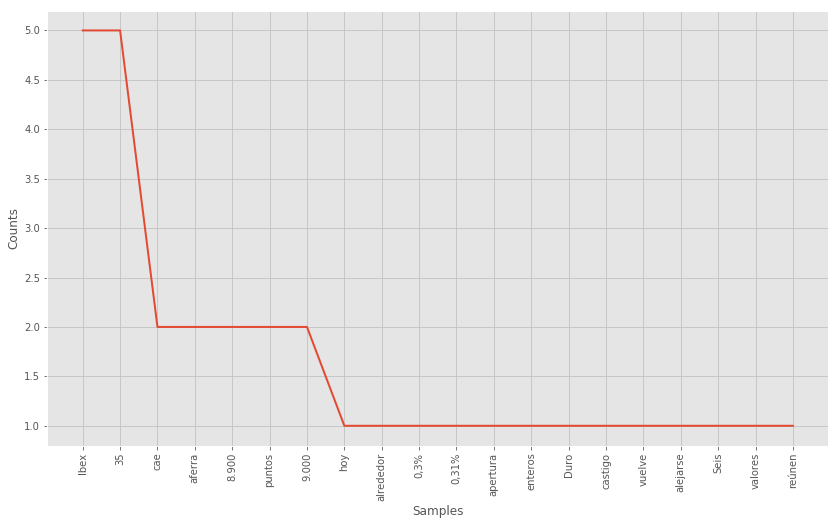

In [0]:
plt.figure(figsize=(14,8))
freq.plot(20, cumulative=False)

In [0]:
import datetime
print(datetime.datetime.now())

2019-02-25 13:36:12.472046
